<a href="https://colab.research.google.com/github/osama1hatem2abdelkreem3/Graduation-Project/blob/main/GP_without_Data_Augmantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install the dependeses

In [58]:
!pip install torchinfo

# import packages

In [59]:
import os
import sys
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from torch.utils.data import DataLoader, random_split
from torchinfo import summary
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

torch.backends.cudnn.deterministic = True

In [60]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("PIL version:", PIL.__version__)
print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

Platform: linux
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
---
matplotlib version: 3.10.0
pandas version: 2.2.2
PIL version: 11.3.0
torch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


In [61]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device.")

Using cpu device.


# Task
Download and extract the dataset from the Google Drive link "https://drive.google.com/file/d/1-vdiNStgmTHq4kF6zGzN2fYLI9qIz-tE/view".

## Install gdown

### Subtask:
Install the `gdown` library using pip.


**Reasoning**:
Install the gdown library using pip.



In [62]:
!pip install gdown

## Download the dataset

### Subtask:
Use `gdown` to download the zip file from the provided Google Drive link.


**Reasoning**:
Import gdown and download the file using gdown.download().



In [63]:
import gdown

file_id = "1-vdiNStgmTHq4kF6zGzN2fYLI9qIz-tE"
output_path = "plant_village.zip"

gdown.download(id=file_id, output=output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-vdiNStgmTHq4kF6zGzN2fYLI9qIz-tE
From (redirected): https://drive.google.com/uc?id=1-vdiNStgmTHq4kF6zGzN2fYLI9qIz-tE&confirm=t&uuid=6e1d1649-e253-4891-96e3-7e43403b747e
To: /content/plant_village.zip
100%|██████████| 320M/320M [00:02<00:00, 110MB/s] 


'plant_village.zip'

## Extract the dataset

### Subtask:
Extract the contents of the downloaded zip file.


**Reasoning**:
Extract the contents of the downloaded zip file.



In [64]:
import zipfile
import os

zip_file_path = "plant_village.zip"
extraction_directory = "plant_village"

os.makedirs(extraction_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

print(f"Extracted {zip_file_path} to {extraction_directory}")

Extracted plant_village.zip to plant_village


# split folder into train and test

In [65]:
!pip install split-folder

In [66]:
import split_folder
input_folder = '/content/plant_village/SPAD_DATA'
output_folder = '/content/DataSet'
split_folder.ratio(input_folder, output=output_folder, ratio=(.8, .2))


Copying (82) of .. train/Electrical-damage



  0%|          | 0/82 [00:00<?, ?it/s]


Copying (21) of .. val/Electrical-damage



  0%|          | 0/21 [00:00<?, ?it/s]


Copying (98) of .. train/Snow-Covered



  0%|          | 0/98 [00:00<?, ?it/s]


Copying (25) of .. val/Snow-Covered



  0%|          | 0/25 [00:00<?, ?it/s]


Copying (152) of .. train/Dusty



  0%|          | 0/152 [00:00<?, ?it/s]


Copying (38) of .. val/Dusty



  0%|          | 0/38 [00:00<?, ?it/s]


Copying (165) of .. train/Bird-drop



  0%|          | 0/165 [00:00<?, ?it/s]


Copying (42) of .. val/Bird-drop



  0%|          | 0/42 [00:00<?, ?it/s]


Copying (154) of .. train/Clean



  0%|          | 0/154 [00:00<?, ?it/s]


Copying (39) of .. val/Clean



  0%|          | 0/39 [00:00<?, ?it/s]


Copying (55) of .. train/Physical-Damage



  0%|          | 0/55 [00:00<?, ?it/s]


Copying (14) of .. val/Physical-Damage



  0%|          | 0/14 [00:00<?, ?it/s]

In [67]:
%rm -rf /content/plant_village

# make the training tensor and the data augmantation

In [68]:
train_transform = transforms.Compose(
    [

        transforms.Resize((224, 224)),
        # transforms.RandomHorizontalFlip(p=0.5),
        # transforms.RandomVerticalFlip(p=0.5),
        # transforms.RandomRotation(degrees=30),
        # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        # transforms.RandomGrayscale(p=0.1),
        # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        # transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
        transforms.ToTensor(),
    ]
)

## def the train and test files

In [69]:
data_dir = '/content/DataSet'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'val')

print("Will read data from", train_dir)

Will read data from /content/DataSet/train


In [70]:
dataset =datasets.ImageFolder(root = train_dir, transform = train_transform)

# classes

In [71]:
print("Classes:")
print(dataset.classes)
print(f"That's {len(dataset.classes)} classes")
print()
print("Tensor shape for one image:")
print(dataset[0][0].shape)

Classes:
['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
That's 6 classes

Tensor shape for one image:
torch.Size([3, 224, 224])


# setting up the data loader args

In [72]:
batch_size = 32
dataset_loader = DataLoader(dataset, batch_size=batch_size)

# Get one batch
first_batch = next(iter(dataset_loader))

print(f"Shape of one batch: {first_batch[0].shape}")
print(f"Shape of labels: {first_batch[1].shape}")

Shape of one batch: torch.Size([32, 3, 224, 224])
Shape of labels: torch.Size([32])


# get mean and standered deciation

the preformance will incress if the input of the mean = 0 and the std =1

it's realated with normalizing






In [73]:
def get_mean_std(loader):
    """Computes the mean and standard deviation of image data.

    Input: a `DataLoader` producing tensors of shape [batch_size, channels, pixels_x, pixels_y]
    Output: the mean of each channel as a tensor, the standard deviation of each channel as a tensor
            formatted as a tuple (means[channels], std[channels])"""

    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in tqdm(loader, desc="Computing mean and std", leave=False):
        channels_sum += torch.mean(data, dim=[0, 2, 3])
        channels_squared_sum += torch.mean(data**2, dim=[0, 2, 3])
        num_batches += 1
    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean**2) ** 0.5

    return mean, std

In [74]:
mean , std = get_mean_std(dataset_loader)

Computing mean and std:   0%|          | 0/23 [00:00<?, ?it/s]

In [75]:
print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

Mean: tensor([0.4206, 0.4488, 0.5086])
Standard deviation: tensor([0.2490, 0.2336, 0.2234])


# transform to normalize
- we will make a new transform so we get better results
- we also will make new data loader with normalized datasets

In [76]:
transform_norm = transforms.Compose(
    [

        transforms.Resize((224, 224)),
        # augmatation
        # transforms.RandomHorizontalFlip(p=0.5),
        # transforms.RandomVerticalFlip(p=0.5),
        # transforms.RandomRotation(degrees=30),
        # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        # transforms.RandomGrayscale(p=0.1),
        # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        # transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
        #end of augmantation
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ]
)

In [77]:
norm_dataset = datasets.ImageFolder(root=train_dir, transform=transform_norm)

norm_loader = DataLoader(norm_dataset, batch_size=32)

# we try to remake the std and the mean with new norm_data set and data_loader

In [78]:
norm_mean , norm_std = get_mean_std(norm_loader)

Computing mean and std:   0%|          | 0/23 [00:00<?, ?it/s]

In [79]:

print(f"Mean: {norm_mean}")
print(f"Standard deviation: {norm_std}")

Mean: tensor([ 5.5717e-08, -3.2718e-07,  6.4950e-08])
Standard deviation: tensor([1.0000, 1.0000, 1.0000])


# make a normalized dataset

In [80]:
# Important, don't change this!
g = torch.Generator()
g.manual_seed(42)

train_dataset, val_dataset = random_split(norm_dataset, [0.8,0.2])

length_train = len(train_dataset)
length_val = len(val_dataset)
length_dataset = len(norm_dataset)
percent_train = np.round(100 * length_train / length_dataset, 2)
percent_val = np.round(100 * length_val / length_dataset, 2)

print(f"Train data is {percent_train}% of full data")
print(f"Validation data is {percent_val}% of full data")

Train data is 80.03% of full data
Validation data is 19.97% of full data


In [81]:
def class_counts(dataset):
    c = Counter(x[1] for x in tqdm(dataset))
    class_to_index = dataset.dataset.class_to_idx
    return pd.Series({cat: c[idx] for cat, idx in class_to_index.items()})

# double check of the distrubution + ploting

In [82]:
train_class_distributions = class_counts(train_dataset)

train_class_distributions

  0%|          | 0/565 [00:00<?, ?it/s]

,0
Bird-drop,131
Clean,125
Dusty,123
Electrical-damage,60
Physical-Damage,44
Snow-Covered,82


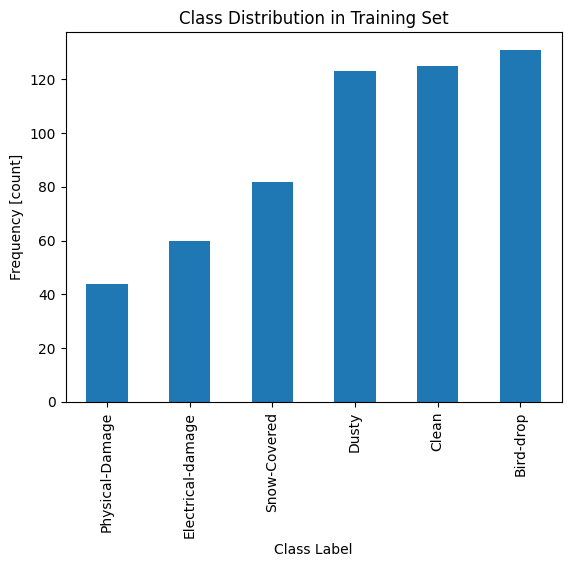

In [83]:
# Create a bar plot from train_class_distribution
train_class_distributions.sort_values().plot(kind="bar", title="Class Distribution in Training Set")


# Add axis labels and title
plt.xlabel("Class Label")
plt.ylabel("Frequency [count]")
plt.title("Class Distribution in Training Set");

  0%|          | 0/141 [00:00<?, ?it/s]

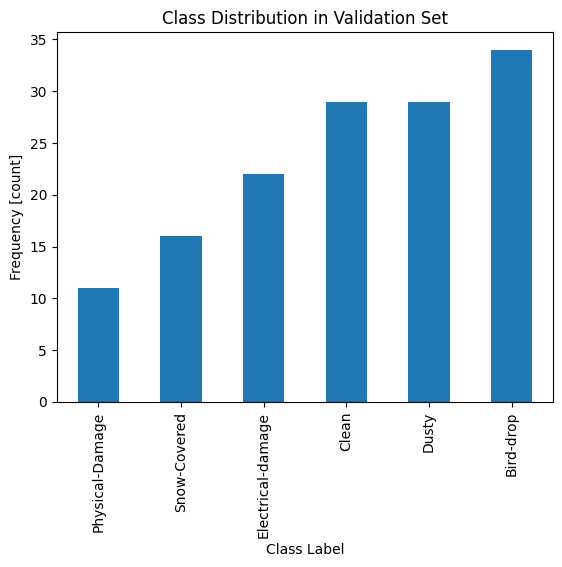

In [84]:
# Get the class distribution
validation_class_distributions = class_counts(val_dataset)


# Create a bar plot from train_class_distribution
validation_class_distributions.sort_values().plot(kind="bar", title="Class Distribution in Training Set")

# Add axis labels and title
plt.xlabel("Class Label")
plt.ylabel("Frequency [count]")
plt.title("Class Distribution in Validation Set");

# create dataloader for train and test set and batch size

In [85]:
# Important, don't change this!
g = torch.Generator()
g.manual_seed(42)


batch_size = 32 # batch size (hyper parm)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

single_batch = next(iter(train_loader))[0]
print(f"Shape of one batch: {single_batch.shape}")

Shape of one batch: torch.Size([32, 3, 224, 224])


***End of dataset prepration***

> there is a train and test dataset through a dataloader



> there is a Tensor ready to be augmanted





# making the model
the model is a classification model that should give us 4 prediction
- clean
- dusty
- bird drop
- physical damage
- snow covered
- electrical damage

we will classify the input image one of the upove classes

In [86]:
norm_dataset.classes #showing the classes we have

['Bird-drop',
 'Clean',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Snow-Covered']

## sample to make know which have the most confidance in our prediction
helps to know whats going on in the model *make it more readable for us*

In [87]:
sample_confidence = torch.tensor([0.13, 0.01, 0.12, 0.10, 0.34, 0.12])

In [88]:
torch.argmax(sample_confidence)

tensor(4)

In [89]:
classes = norm_dataset.classes

class_number = torch.argmax(sample_confidence)
prediction = classes[class_number]

print(f"This image is a {prediction}")

This image is a Physical-Damage


# CNN model with pytorch
pytorch will make the model for us doing the CNN and the MAX POLING part


make the first dimintion of layers

## build the first model and the first conv layer

In [90]:
model_seq = torch.nn.Sequential()

In [91]:
conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), padding=1)
model_seq.append(conv1)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

test batch to chech what we done and to help us build the second layer

In [92]:
test_batch = next(iter(train_loader))[0]

we should have 32 images with 3 color (RGB) channels and size of 244*244

In [93]:
batch_shape = test_batch.shape

print(f"Batch shape: {batch_shape}")

Batch shape: torch.Size([32, 3, 224, 224])


## lets give that batch to the netwrok and see what we will get

In [94]:
first_step_out = model_seq(test_batch)

In [95]:
first_step_shape = first_step_out.shape

print(f"Shape after first convolution layer: {first_step_shape}")

Shape after first convolution layer: torch.Size([32, 16, 224, 224])


as we see the output channel now is 16 - what we expected

In [96]:
model_seq.append(torch.nn.ReLU())

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
)

## building the MAXPOOL FUNC

max pool min the paramaters that the network will work on so it take a 4 * 4 pixels into 2 * 2

*Note*: the max pool doesen't work on the channel size

In [97]:
max_pool1 = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2)
model_seq.append(max_pool1)


Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
)

then we test again

In [98]:
max_pool_out = model_seq(test_batch)
max_pool_shape = max_pool_out.shape

print(f"Shape after first max pool: {max_pool_shape}")

Shape after first max pool: torch.Size([32, 16, 112, 112])


## build the second conv with the second maxpool

In [99]:
second_conv = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1) # make the second conv
second_pool = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2) # make the second maxpool
model_seq.append(second_conv) # add layers to the model
model_seq.append(torch.nn.ReLU())
model_seq.append(second_pool)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
)

test again

In [100]:
second_set_out = model_seq(test_batch)
second_set_shape = second_set_out.shape

print(f"Shape after second convolution layer: {second_set_shape}")

Shape after second convolution layer: torch.Size([32, 32, 56, 56])


## third layer of CNN

In [101]:
conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
max_pool3 = torch.nn.MaxPool2d(2)
model_seq.append(conv3)
model_seq.append(torch.nn.ReLU())
model_seq.append(max_pool3)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [102]:
third_set_out = model_seq(test_batch)
third_set_shape = third_set_out.shape

print(f"Shape after third max pool: {third_set_shape}")

Shape after third max pool: torch.Size([32, 64, 28, 28])


## Now after that we flat the model form tensor to vector

In [103]:
model_seq.append(torch.nn.Flatten())

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
)

In [104]:
flat_out = model_seq(test_batch)
flat_shape = flat_out.shape

print(f"Shape after flattening: {flat_shape}")

Shape after flattening: torch.Size([32, 50176])


## we now add the linear layer (dense) that work as a hidden layer

In [105]:
linear1 = torch.nn.Linear(in_features=50176, out_features=500)

model_seq.append(linear1)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=50176, out_features=500, bias=True)
)

In [106]:
model_seq.append(torch.nn.ReLU()) # add the activation function

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=50176, out_features=500, bias=True)
  (11): ReLU()
)

In [107]:
output_layer = torch.nn.Linear(in_features=500, out_features=6)

model_seq.append(output_layer)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=50176, out_features=500, bias=True)
  (11): ReLU()
  (12): Linear(in_features=500, out_features=6, bias=True)
)

test again

In [108]:
model_seq(test_batch).shape

torch.Size([32, 6])

# Rebuild the full model with droup out and other layers

> Adding droup out to prevent the overfitting

In [109]:
# Important! Don't change this
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = torch.nn.Sequential()

conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), padding=1)
max_pool1 = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2)
model.append(conv1)
model.append(torch.nn.ReLU())
model.append(max_pool1)

conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1)
max_pool2 = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2)
model.append(conv2)
model.append(torch.nn.ReLU())
model.append(max_pool2)

conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
max_pool3 = torch.nn.MaxPool2d(2)
model.append(conv3)
model.append(torch.nn.ReLU())
model.append(max_pool3)

model.append(torch.nn.Flatten())
model.append(torch.nn.Dropout())

linear1 = torch.nn.Linear(in_features=50176, out_features=500)  #(HP)
model.append(linear1)
model.append(torch.nn.ReLU())
model.append(torch.nn.Dropout())

output_layer = torch.nn.Linear(500, 8) #(HP)
model.append(output_layer)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=50176, out_features=500, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=500, out_features=8, bias=True)
)

## lets summarize what we have in our model

In [110]:
height, width = 224, 224
summary(model, input_size=(batch_size, 3, height, width))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 8]                   --
├─Conv2d: 1-1                            [32, 16, 224, 224]        448
├─ReLU: 1-2                              [32, 16, 224, 224]        --
├─MaxPool2d: 1-3                         [32, 16, 112, 112]        --
├─Conv2d: 1-4                            [32, 32, 112, 112]        4,640
├─ReLU: 1-5                              [32, 32, 112, 112]        --
├─MaxPool2d: 1-6                         [32, 32, 56, 56]          --
├─Conv2d: 1-7                            [32, 64, 56, 56]          18,496
├─ReLU: 1-8                              [32, 64, 56, 56]          --
├─MaxPool2d: 1-9                         [32, 64, 28, 28]          --
├─Flatten: 1-10                          [32, 50176]               --
├─Dropout: 1-11                          [32, 50176]               --
├─Linear: 1-12                           [32, 500]                 25,088,500

# Adding the train and predect func , optimizer .... etc

## adding the train_epochs , pridect , score and train fucns

In [111]:
def train_epoch(model, optimizer, loss_fn, data_loader, device="cpu"):

    training_loss = 0.0
    model.train()

    # Iterate over all batches in the training set to complete one epoch
    for inputs, targets in tqdm(data_loader, desc="Training", leave=False):
        optimizer.zero_grad()
        inputs = inputs.to(device)
        targets = targets.to(device)

        output = model(inputs)
        loss = loss_fn(output, targets)

        loss.backward()
        optimizer.step()
        training_loss += loss.data.item() * inputs.size(0)

    return training_loss / len(data_loader.dataset)
    # REMOVE}


def predict(model, data_loader, device="cpu"):
    # INSERT ...
    # REMOVE{
    all_probs = torch.tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for inputs, targets in tqdm(data_loader, desc="Predicting", leave=False):
            inputs = inputs.to(device)
            output = model(inputs)
            probs = torch.nn.functional.softmax(output, dim=1)
            all_probs = torch.cat((all_probs, probs), dim=0)

    return all_probs
    # REMOVE}


def score(model, data_loader, loss_fn, device="cpu"):
    # INSERT ...
    # REMOVE{
    total_loss = 0
    total_correct = 0

    model.eval()
    with torch.no_grad():
        for inputs, targets in tqdm(data_loader, desc="Scoring", leave=False):
            inputs = inputs.to(device)
            output = model(inputs)

            targets = targets.to(device)
            loss = loss_fn(output, targets)
            total_loss += loss.data.item() * inputs.size(0)

            correct = torch.eq(torch.argmax(output, dim=1), targets)
            total_correct += torch.sum(correct).item()
    average_loss = total_loss / len(data_loader.dataset)
    accuracy = total_correct / len(data_loader.dataset)
    return average_loss, accuracy
    # REMOVE}


def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):


    for epoch in range(1, epochs + 1):
        # Train one epoch
        training_loss = train_epoch(model, optimizer, loss_fn, train_loader, device)

        # Test on validation set
        validation_loss, validation_accuracy = score(model, val_loader, loss_fn, device)

        print(
            f"Epoch: {epoch}, Training Loss: {training_loss:.2f}, "
            f"Validation Loss: {validation_loss:.2f}, Validation accuracy = {validation_accuracy:.2f}"
        )





## add the loss func and the optimizer

In [112]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=50176, out_features=500, bias=True)
  (12): ReLU()
  (13): Dropout(p=0.5, inplace=False)
  (14): Linear(in_features=500, out_features=8, bias=True)
)

## start the training fucntion

- we add the model we made
- the optemizer (adam) most likely
- loss_function (crossEntropy)
- train and val loader
- epoches
- device (GPU) , but the defult is CPU

In [116]:
train(model,optimizer,loss_fn,train_loader,val_loader,epochs=8,device=device)

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1, Training Loss: 1.59, Validation Loss: 1.53, Validation accuracy = 0.48


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 2, Training Loss: 1.28, Validation Loss: 1.28, Validation accuracy = 0.54


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 3, Training Loss: 1.12, Validation Loss: 1.18, Validation accuracy = 0.57


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 4, Training Loss: 0.93, Validation Loss: 1.11, Validation accuracy = 0.62


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 5, Training Loss: 0.65, Validation Loss: 1.06, Validation accuracy = 0.62


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 6, Training Loss: 0.49, Validation Loss: 1.23, Validation accuracy = 0.64


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 7, Training Loss: 0.35, Validation Loss: 1.17, Validation accuracy = 0.65


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Scoring:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 8, Training Loss: 0.25, Validation Loss: 1.20, Validation accuracy = 0.64


## make the pridection

In [117]:
probabilities = predict(model, val_loader, device)
predictions = torch.argmax(probabilities, dim=1)

Predicting:   0%|          | 0/5 [00:00<?, ?it/s]

In [118]:
predictions

tensor([5, 2, 0, 3, 2, 1, 2, 2, 1, 5, 2, 3, 1, 3, 2, 2, 5, 2, 3, 1, 2, 1, 2, 2,
        5, 5, 2, 1, 1, 4, 1, 3, 1, 0, 2, 3, 0, 1, 5, 4, 2, 0, 1, 0, 1, 2, 3, 2,
        2, 3, 0, 0, 2, 0, 1, 4, 5, 1, 0, 3, 3, 5, 1, 3, 0, 1, 0, 1, 5, 5, 2, 5,
        0, 2, 5, 1, 0, 5, 3, 5, 4, 1, 4, 3, 5, 0, 0, 2, 5, 1, 2, 1, 3, 1, 1, 0,
        0, 2, 1, 5, 1, 0, 4, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 5, 1, 5, 1,
        1, 5, 0, 2, 1, 1, 2, 2, 0, 2, 5, 4, 4, 1, 2, 5, 0, 2, 1, 2, 0])

In [119]:
targets = []

for _, labels in tqdm(val_loader):
    targets.extend(labels.tolist())

  0%|          | 0/5 [00:00<?, ?it/s]

In [120]:
targets[:10]

[0, 2, 0, 3, 5, 1, 2, 1, 1, 5]

## now we make the confusion matrix

In [121]:
classes

['Bird-drop',
 'Clean',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Snow-Covered']

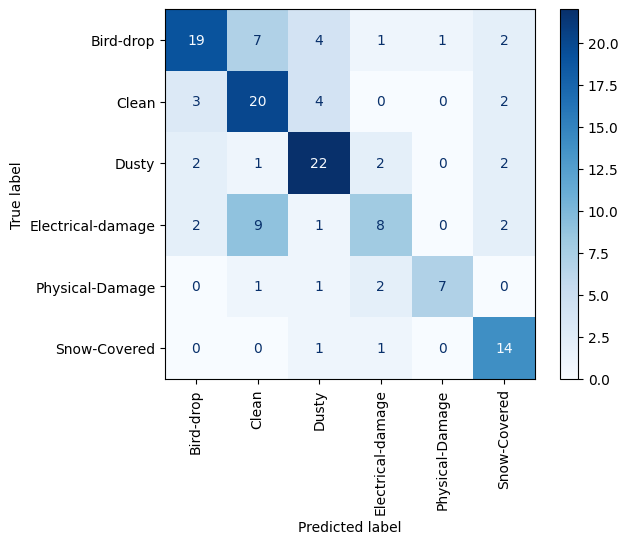

In [122]:
cm = confusion_matrix(targets, predictions.cpu())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.show();

this give us how the model is working well and where is the problem in the model